<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
   
                                          
                                          
                                          
                                          
                                          
#                               Linear Discriminant Analysis (LDA) in Predicting Obesity Risk




##                                                        Gladys Murage

##                              College of Business, Engineering, and  Technology, National University

##                                         DDS8555 v1: PREDICTIVE ANALYSIS(3602869492)

##                                                        Dr MOHAMED NABEEL

##                                                            April 06, 2025


<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>

LDA Accuracy: 0.8265895953757225
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.89      0.87       524
      Normal_Weight       0.75      0.75      0.75       626
     Obesity_Type_I       0.80      0.76      0.78       543
    Obesity_Type_II       0.92      0.97      0.94       657
   Obesity_Type_III       0.99      1.00      1.00       804
 Overweight_Level_I       0.67      0.60      0.63       484
Overweight_Level_II       0.67      0.69      0.68       514

           accuracy                           0.83      4152
          macro avg       0.81      0.81      0.81      4152
       weighted avg       0.82      0.83      0.82      4152



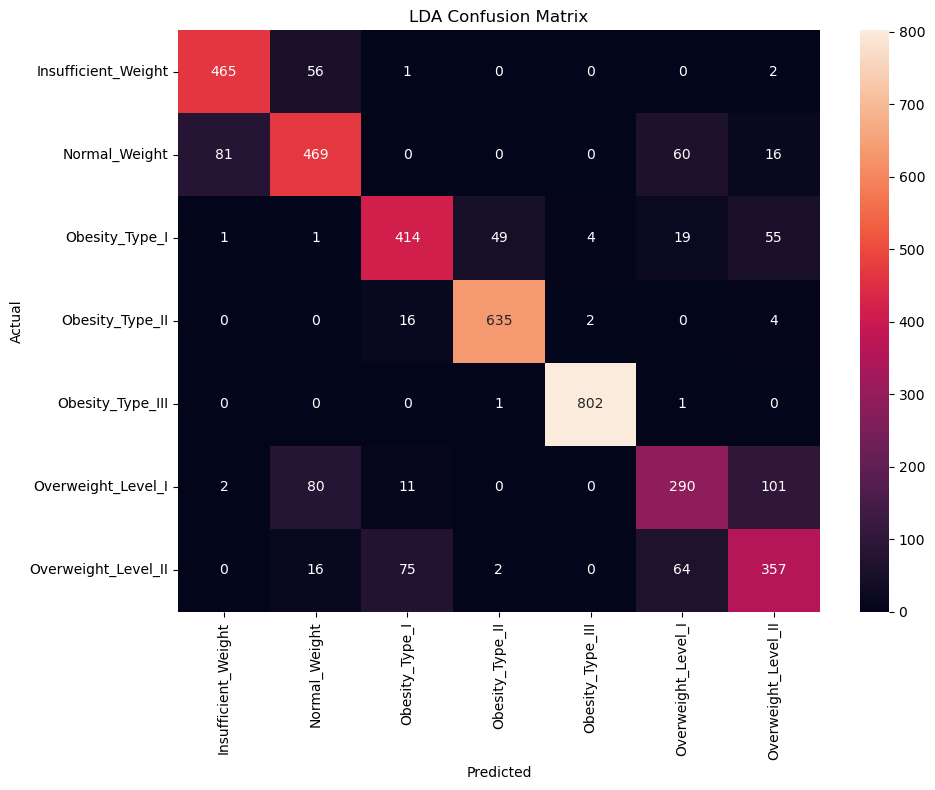

In [15]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv('Otrain.csv')
test = pd.read_csv('Otest.csv')
sample_sub = pd.read_csv('Osample_submission.csv')

# Prepare features and target
X_train = train.drop('NObeyesdad', axis=1)
y_train = train['NObeyesdad']
X_test = test.copy()  # Assuming test doesn't have target column

# Identify column types
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Process training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Encode target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_processed, y_train_encoded)

# Create validation set
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Process validation data
X_val_processed = preprocessor.transform(X_val)
y_val_encoded = le.transform(y_val)

# Evaluate
val_preds = le.inverse_transform(lda.predict(X_val_processed))
print("LDA Accuracy:", accuracy_score(y_val, val_preds))
print(classification_report(y_val, val_preds))

# Confusion matrix
# Confusion matrix
cm = confusion_matrix(y_val, val_preds, labels=le.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_) 
plt.title('LDA Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig('LDA_Confusion_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()


# Generate submission
test_preds = le.inverse_transform(lda.predict(X_test_processed))
submission = sample_sub.copy()
submission['NObeyesdad'] = test_preds
submission.to_csv("LDA_submission.csv", index=False)

# Interpretation of the Linear Discriminant Analysis Classification Model

# 1. Overall Model Performance
## Accuracy: 82.66%
The model correctly classifies obesity levels for approximately 83% of cases, showing strong overall performance. This means that about 83% of the validation predictions were correct.
## Macro average F1-score: 0.81 
Averaged across all classes equally  and ignoring class imbalance.
## Weighted average F1-score: 0.82 
Weighted by class support, this is a better reflection of real-world performance.

# 2. Class Specific Performance
## Class	            Precision	Recall	F1-score	Support
#### Insufficient_Weight	0.85	0.89	0.87	     524
#### Normal_Weight	        0.75	0.75	0.75	     626
#### Obesity_Type_I	        0.80	0.76	0.78	     543
#### Obesity_Type_II	    0.92	0.97	0.94	     657
#### Obesity_Type_III	    0.99	1.00	1.00	     804
#### Overweight_Level_I	    0.67	0.60	0.63	     484
#### Overweight_Level_II	0.67	0.69	0.68	     514

# 3.  Observations:
## Best Performance:
1. Obesity_Type_III is almost perfectly classified (F1 = 1.00).Perfect classification due to distinct characteristics.

2. Obesity_Type_II also performs excellently (F1 = 0.94). High precision/recall, likely due to clear physiological markers.

3. Insufficient_Weight has strong performance (F1 = 0.87).
   
## Challenging Classes:
4. Normal_Weight and Obesity_Type_I are in the mid-range (F1 approximately = 0.75–0.78).Misclassifications may occur with adjacent categories e.g., Overweight_Level_I.

5. Overweight_Level_I/II are the weakest classes (F1 approximately= 0.63–0.68), meaning that both classes are harder to distinguish. Lower metrics suggest these categories overlap with Normal_Weight or mild obesity.


# 4. Confusion Matrix Interpretation
From the heatmap the following observations are made:
## Many confusions between adjacent weight levels:

1. Normal_Weight is often confused with Overweight_Level_I.

2. Overweight_Level_I and II are commonly confused with each other and with Normal_Weight.

3. Obesity_Type_III stands out as correctly predicted almost all the time.

4. Obesity_Type_I is occasionally mis-classified as Obesity_Type_II and vice versa.

5. Insufficient_Weight is often confused with Normal_Weight.
rmal_Weight

# 5. Practical Implications
## Strengths:
1. High performance for classes with more distinct features (Obesity_Type_III, II, Insufficient_Weight)
2. Reliable for extreme categories such as underweight, and severe obesity.
3. Useful for clinical screening where severe cases need prioritization.

## Limitations:

1. Confusion between Normal, Overweight, and Obesity_Type_I.
2. May need refinement for intermediate categories such as overweight and mild obesity.
3. Class imbalance e.g., more Obesity_Type_III samples can inflate accuracy.

# 6. Summary and recommendations for improvement
The LDA model performs well for severe obesity/underweight classification but struggles with intermediate weight categories. Focus on improving feature selection and addressing class overlap for better granularity in predictions. Overall LDA does quite well, but could benefit from:

1. Feature engineering:
   a. Use polynomial terms, and interactions:
   b. Add composite features e.g., BMI = weight/height².
   c. Include behavioral data  such as diet, and exercise if available

3. Trying non-linear models for non-linear boundaries  e.g., QDA, SVM, Random Forests,

4. Using ensemble methods such XGBOOST and Random forest

5. Address Class Imbalance: use class weights or oversampling for minority classes e.g., Overweight_Level_I.

6. Threshold Adjustment: optimize decision thresholds for precision/recall trade-offs in critical categories.